In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicago-crime-dataset-2001-present/Crimes_-_2001_to_Present.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare, ks_2samp



In [5]:
use_cols = [
    'ID', 'Date', 'Primary Type', 'Description', 'Location Description',
    'Arrest', 'Domestic', 'Year', 'Longitude', 'Latitude', 'Community Area'
]



In [6]:
data = pd.read_csv("/kaggle/input/chicago-crime-dataset-2001-present/Crimes_-_2001_to_Present.csv",usecols=use_cols)
data.head(10)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude
0,11646166,09/01/2018 12:01:00 AM,THEFT,OVER $500,RESIDENCE,False,True,44.0,2018,NaN,NaN
1,11645836,05/01/2016 12:25:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,63.0,2016,NaN,NaN
2,11449702,07/31/2018 01:30:00 PM,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,41.0,2018,NaN,NaN
3,11643334,12/19/2018 04:30:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,19.0,2018,NaN,NaN
4,11645527,02/02/2015 10:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,56.0,2015,NaN,NaN
5,11034701,01/01/2001 11:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,45.0,2001,NaN,NaN
6,10224881,09/03/2015 06:00:00 PM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,39.0,2015,41.813999,-87.598138
7,11230640,12/04/2017 12:00:00 AM,OTHER OFFENSE,SEX OFFENDER: FAIL TO REGISTER,GOVERNMENT BUILDING/PROPERTY,True,False,35.0,2017,NaN,NaN
8,11645648,01/01/2018 08:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,19.0,2018,NaN,NaN
9,11645959,12/20/2018 04:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,14.0,2018,NaN,NaN


In [7]:
data.shape

(7846809, 11)

In [8]:
year_counts = data['Year'].value_counts().sort_index()
print(year_counts)


Year
2001    485885
2002    486805
2003    475983
2004    469421
2005    453772
2006    448178
2007    437087
2008    427169
2009    392825
2010    370505
2011    351975
2012    336273
2013    307478
2014    275745
2015    264775
2016    269808
2017    269092
2018    268811
2019    261290
2020    212170
2021    208733
2022    238712
2023    134317
Name: count, dtype: int64


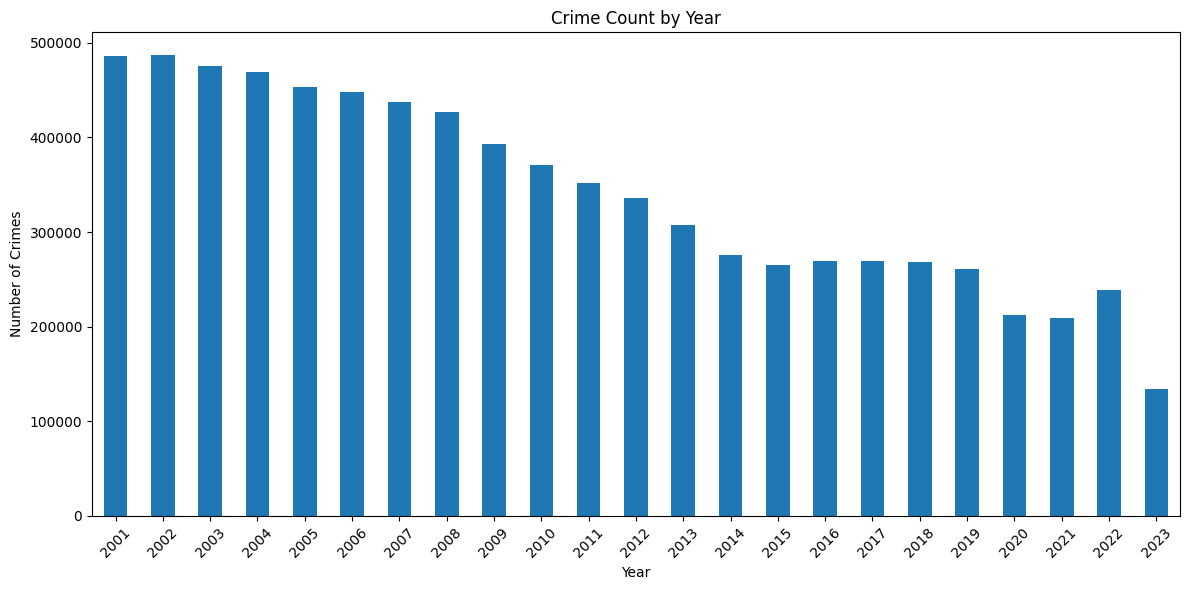

In [9]:
plt.figure(figsize=(12, 6))
data['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Crime Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
primary_type_counts = data['Primary Type'].value_counts()
print(primary_type_counts)


Primary Type
THEFT                                1655523
BATTERY                              1433696
CRIMINAL DAMAGE                       894469
NARCOTICS                             748757
ASSAULT                               512777
OTHER OFFENSE                         487246
BURGLARY                              426115
MOTOR VEHICLE THEFT                   382245
DECEPTIVE PRACTICE                    349195
ROBBERY                               294608
CRIMINAL TRESPASS                     215363
WEAPONS VIOLATION                     108629
PROSTITUTION                           69878
OFFENSE INVOLVING CHILDREN             56224
PUBLIC PEACE VIOLATION                 52544
SEX OFFENSE                            31028
CRIM SEXUAL ASSAULT                    27606
INTERFERENCE WITH PUBLIC OFFICER       18515
LIQUOR LAW VIOLATION                   14953
GAMBLING                               14621
ARSON                                  13384
HOMICIDE                               127

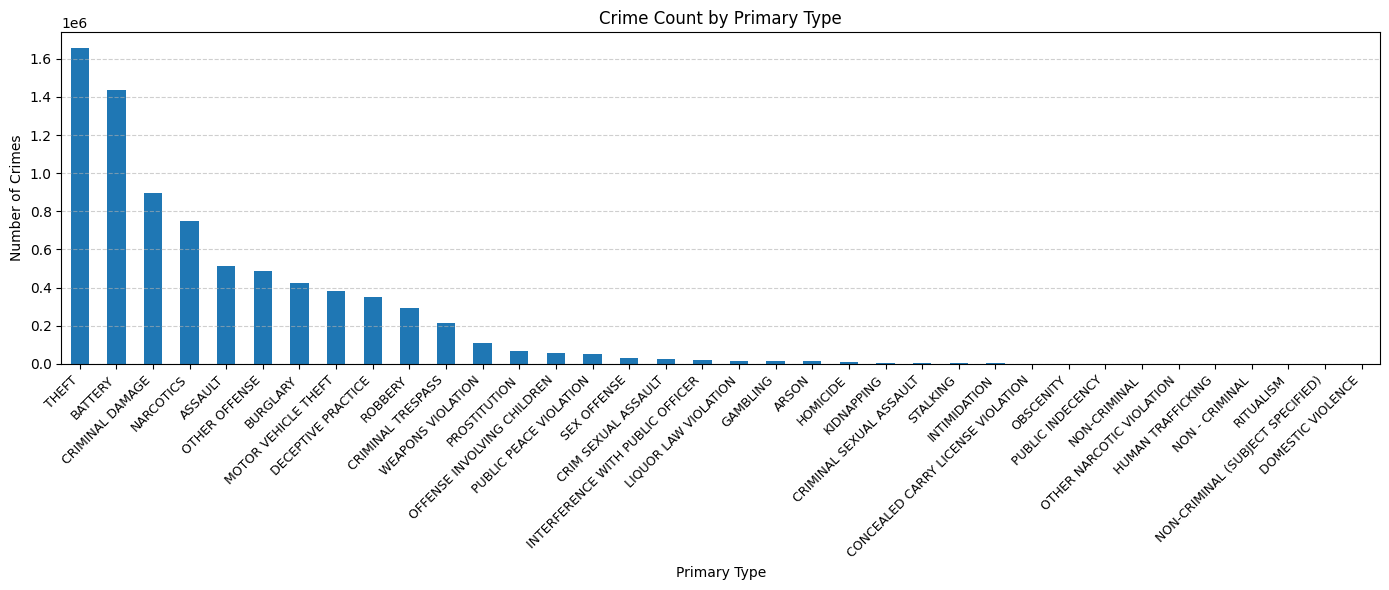

In [11]:
crime_counts = data['Primary Type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
crime_counts.plot(kind='bar')

plt.title('Crime Count by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Number of Crimes')

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

***sampling***

In [12]:
data['Strata'] = data['Year'].astype(str) + '_' + data['Primary Type']

# Remove strata with fewer than 2 samples
valid_strata = data['Strata'].value_counts()
valid_strata = valid_strata[valid_strata >= 2].index
df_filtered = data[data['Strata'].isin(valid_strata)].copy()


In [13]:
# Stratified sampling: 10% of filtered dataset
sample_df, _ = train_test_split(
    df_filtered,
    test_size=0.9,
    stratify=df_filtered['Strata'],
    random_state=42
)

# Drop helper column
sample_df = sample_df.drop(columns='Strata')

# Show result
sample_df.shape

(784679, 11)

In [14]:
# Recreate Hour column from Date
data['Hour'] = pd.to_datetime(data['Date']).dt.hour
sample_df['Hour'] = pd.to_datetime(sample_df['Date']).dt.hour


<ipython-input-14-2ec8b6b029c2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Date']).dt.hour
<ipython-input-14-2ec8b6b029c2>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sample_df['Hour'] = pd.to_datetime(sample_df['Date']).dt.hour


In [15]:
# Re-run validation using the sampled and full dataframes from your environment

# Chi-Square: Arrest
arrest_full = data['Arrest'].value_counts().sort_index()
arrest_sample = sample_df['Arrest'].value_counts().reindex(arrest_full.index, fill_value=0)
chi_arrest = chisquare(f_obs=arrest_sample, f_exp=arrest_full * (len(sample_df) / len(data)))

# Chi-Square: Domestic
domestic_full = data['Domestic'].value_counts().sort_index()
domestic_sample = sample_df['Domestic'].value_counts().reindex(domestic_full.index, fill_value=0)
chi_domestic = chisquare(f_obs=domestic_sample, f_exp=domestic_full * (len(sample_df) / len(data)))

# K-S Test: Hour
ks_hour = ks_2samp(data['Hour'], sample_df['Hour'])

# Return statistical test results
chi_arrest, chi_domestic, ks_hour


(Power_divergenceResult(statistic=0.24837106414599763, pvalue=0.6182244038300837),
 Power_divergenceResult(statistic=0.3294601572779205, pvalue=0.5659771400531624),
 KstestResult(statistic=0.0006091657102109682, pvalue=0.9537589347991914, statistic_location=15, statistic_sign=-1))

In [21]:
from scipy.stats import chisquare

# 1. Get value counts for full and sample datasets
loc_full = data['Location Description'].value_counts().sort_index()
loc_sample = sample_df['Location Description'].value_counts().reindex(loc_full.index, fill_value=0)

# 2. Adjust expected frequencies to exactly match total of observed (sample)
expected_loc_adjusted = loc_full * (loc_sample.sum() / loc_full.sum())

# 3. Run Chi-square test
chi_loc_adjusted = chisquare(f_obs=loc_sample, f_exp=expected_loc_adjusted)

# 4. Print result
print("Chi-Square Test for Location Description:")
print(f"Statistic: {chi_loc_adjusted.statistic:.4f}")
print(f"p-value: {chi_loc_adjusted.pvalue:.4f}")


Chi-Square Test for Location Description:
Statistic: 213.4843
p-value: 0.5356


In [23]:
from scipy.stats import chisquare

# 1. Get counts
area_full = data['Community Area'].value_counts().sort_index()
area_sample = sample_df['Community Area'].value_counts().reindex(area_full.index, fill_value=0)

# 2. Adjust expected frequencies to match total of sample exactly
expected_area_adjusted = area_full * (area_sample.sum() / area_full.sum())

# 3. Run chi-square safely
chi_area_adjusted = chisquare(f_obs=area_sample, f_exp=expected_area_adjusted)

# 4. Print result
print("Chi-Square Test for Community Area:")
print(f"Statistic: {chi_area_adjusted.statistic:.4f}")
print(f"p-value: {chi_area_adjusted.pvalue:.4f}")


Chi-Square Test for Community Area:
Statistic: 59.0559
p-value: 0.9360


In [24]:
# Prepare value counts for Chi-Square Test: Primary Type
type_full = data['Primary Type'].value_counts().sort_index()
type_sample = sample_df['Primary Type'].value_counts().reindex(type_full.index, fill_value=0)
chi_type = chisquare(f_obs=type_sample, f_exp=type_full * (len(sample_df) / len(data)))

# Return test results
chi_type

Power_divergenceResult(statistic=1.8495611423592808, pvalue=0.9999999999999999)

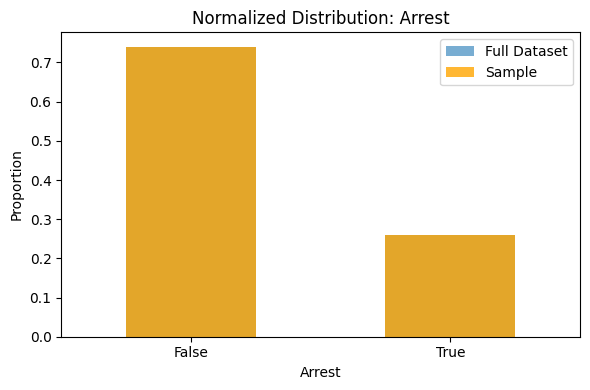

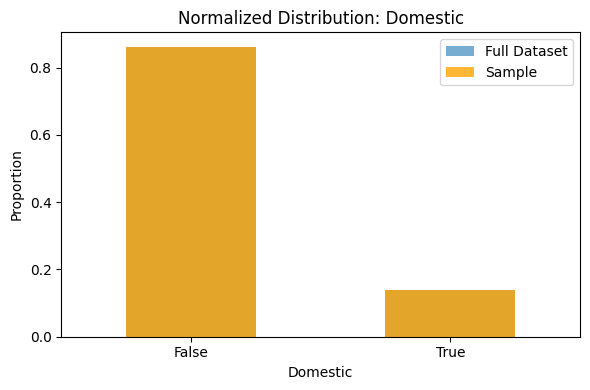

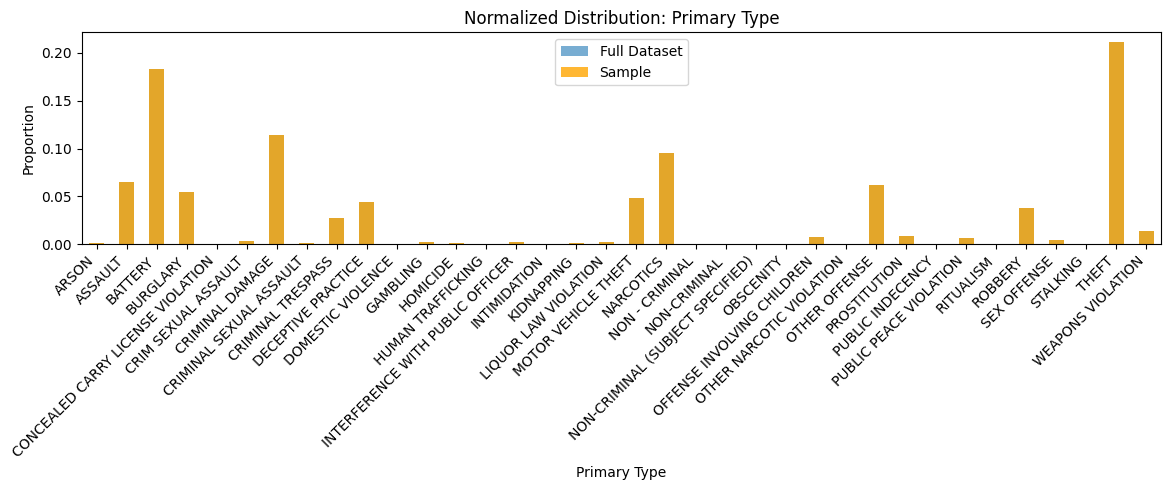

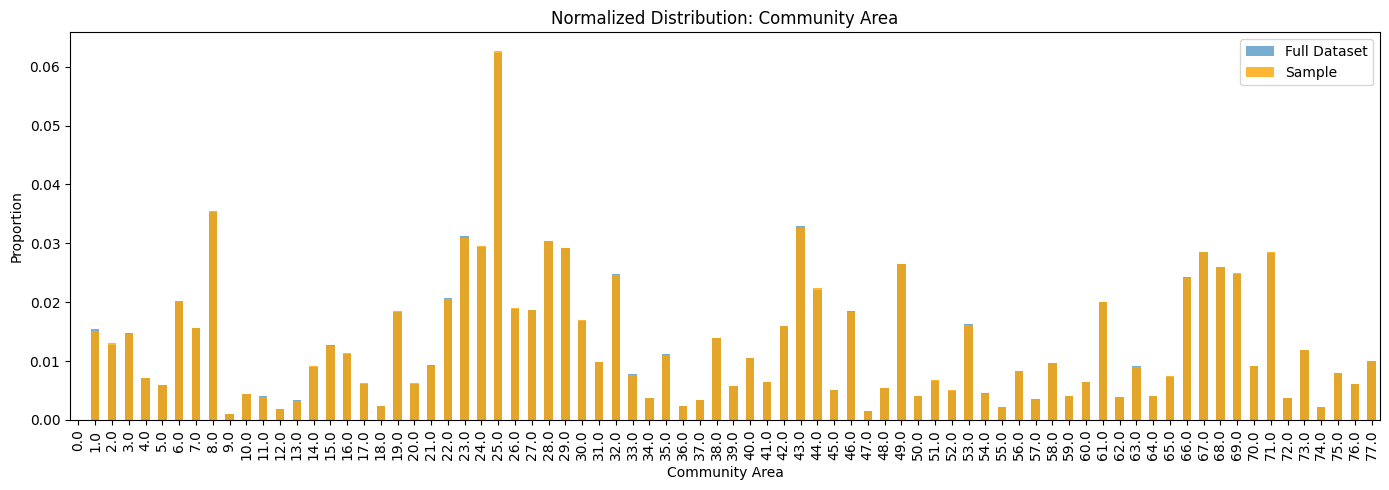

In [26]:
# Recreate needed value counts for visual validation

# Arrest
arrest_full = data['Arrest'].value_counts().sort_index()
arrest_sample = sample_df['Arrest'].value_counts().reindex(arrest_full.index, fill_value=0)

# Domestic
domestic_full = data['Domestic'].value_counts().sort_index()
domestic_sample = sample_df['Domestic'].value_counts().reindex(domestic_full.index, fill_value=0)

# Primary Type
type_full = data['Primary Type'].value_counts().sort_index()
type_sample = sample_df['Primary Type'].value_counts().reindex(type_full.index, fill_value=0)

# Location Description
loc_full = data['Location Description'].value_counts().sort_index()
loc_sample = sample_df['Location Description'].value_counts().reindex(loc_full.index, fill_value=0)

# Community Area
area_full = data['Community Area'].value_counts().sort_index()
area_sample = sample_df['Community Area'].value_counts().reindex(area_full.index, fill_value=0)

# Normalize for comparison
arrest_full_norm = arrest_full / arrest_full.sum()
arrest_sample_norm = arrest_sample / arrest_sample.sum()

domestic_full_norm = domestic_full / domestic_full.sum()
domestic_sample_norm = domestic_sample / domestic_sample.sum()

type_full_norm = type_full / type_full.sum()
type_sample_norm = type_sample / type_sample.sum()

loc_full_norm = loc_full / loc_full.sum()
loc_sample_norm = loc_sample / loc_sample.sum()

area_full_norm = area_full / area_full.sum()
area_sample_norm = area_sample / area_sample.sum()

# Re-run plots
import matplotlib.pyplot as plt

# Arrest
plt.figure(figsize=(6, 4))
arrest_full_norm.plot(kind='bar', alpha=0.6, label='Full Dataset')
arrest_sample_norm.plot(kind='bar', alpha=0.8, label='Sample', color='orange')
plt.title("Normalized Distribution: Arrest")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Domestic
plt.figure(figsize=(6, 4))
domestic_full_norm.plot(kind='bar', alpha=0.6, label='Full Dataset')
domestic_sample_norm.plot(kind='bar', alpha=0.8, label='Sample', color='orange')
plt.title("Normalized Distribution: Domestic")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Primary Type
plt.figure(figsize=(12, 5))
type_full_norm.plot(kind='bar', alpha=0.6, label='Full Dataset')
type_sample_norm.plot(kind='bar', alpha=0.8, label='Sample', color='orange')
plt.title("Normalized Distribution: Primary Type")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

# Community Area
plt.figure(figsize=(14, 5))
area_full_norm.plot(kind='bar', alpha=0.6, label='Full Dataset')
area_sample_norm.plot(kind='bar', alpha=0.8, label='Sample', color='orange')
plt.title("Normalized Distribution: Community Area")
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
sample_df.to_csv("sampled_chicago_crime_final.csv", index=False)
